In [1]:
import numpy as np
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [21]:
np.random.seed(999)

# first let's make an x-axis
# we can do it at regular intervals, we can do it randomly
x = np.random.uniform(10,100,50) # 50 points between 10 and 100
x

array([ 82.30852361,  57.47700661,  20.72003185,  67.57132998,
        18.18327365,  39.90031127,  48.46428527,  59.89472312,
        66.53138702,  72.76536498,  81.095472  ,  21.87013176,
        40.84934065,  28.14036497,  73.65918071,  13.00593379,
        91.83250392,  46.46445984,  78.43919233,  52.63825382,
        35.80470261,  77.61632399,  18.73809491,  47.11220095,
        35.34750663,  45.12500025,  88.39982886,  17.31206055,
        60.21380486,  59.27808509,  39.89827627,  97.59419322,
        35.76484879,  55.74317488,  23.31556623,  27.67905863,
        85.67380097,  10.33778829,  80.43589091,  85.01299452,
        94.41166046,  97.53414969,  84.95407377,  15.92358453,
        46.34133041,  43.73141377,  55.67512121,  98.00892637,
        83.7091188 ,  26.87871197])

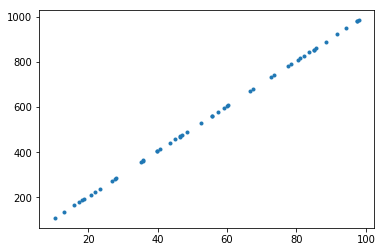

In [22]:
# defining a function in multiple lines (it can be done in one line though)
# it's always a good idea to define your function in its own cell
# we can give the function default parameters by placing them in bw the parentheses where we define the function
def makealine(x, a=10, b=5):
# what parameters does the function need to take?
    y = a * x + b
    return y

L = makealine(x)

pl.plot(x,L,'.')

# for future reference, we're encourage to use classes when we code in Python

In [23]:
# let's use statsmodels to fit it
import statsmodels.api as sm

In [24]:
# let's do it the wrong way first
#dir(sm) # gives you content of the package # we'll use OLS

#sm.OLS? # args it takes are endog (dependent) var, exog(dependent) var

sm.OLS(L, x) # sets up the stage, but doesn't do the fit

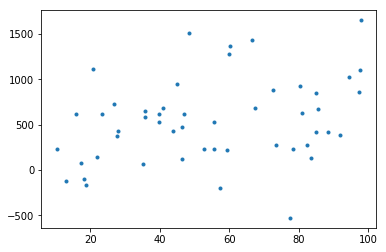

In [30]:
# still the wrong way
lin_model = sm.OLS(L, x).fit()

def makealine2(x, a=10, b=5):
# what parameters does the function need to take?
    y = a * x + b
    return y + np.random.randn(len(y)) * y.mean() # adds some noise

L2 = makealine2(x)

pl.plot(x,L2,'.')

In [39]:
lin_model = sm.OLS(L2, x).fit()

lin_model.params

# if you wanna use this function, you have to manipulate your model and make it 2-D

array([ 9.03163279])

In [37]:
# we're gonna create a new x-axis, a 2-D x-axis
x_2D = sm.add_constant(x)
x_2D

array([[  1.        ,  82.30852361],
       [  1.        ,  57.47700661],
       [  1.        ,  20.72003185],
       [  1.        ,  67.57132998],
       [  1.        ,  18.18327365],
       [  1.        ,  39.90031127],
       [  1.        ,  48.46428527],
       [  1.        ,  59.89472312],
       [  1.        ,  66.53138702],
       [  1.        ,  72.76536498],
       [  1.        ,  81.095472  ],
       [  1.        ,  21.87013176],
       [  1.        ,  40.84934065],
       [  1.        ,  28.14036497],
       [  1.        ,  73.65918071],
       [  1.        ,  13.00593379],
       [  1.        ,  91.83250392],
       [  1.        ,  46.46445984],
       [  1.        ,  78.43919233],
       [  1.        ,  52.63825382],
       [  1.        ,  35.80470261],
       [  1.        ,  77.61632399],
       [  1.        ,  18.73809491],
       [  1.        ,  47.11220095],
       [  1.        ,  35.34750663],
       [  1.        ,  45.12500025],
       [  1.        ,  88.39982886],
 

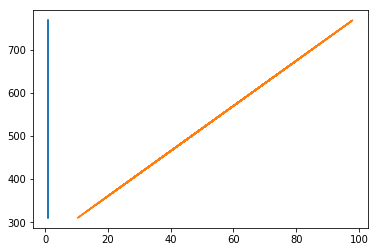

In [40]:
lin_model = sm.OLS(L2, x_2D).fit()
pl.plot(x_2D, lin_model.fittedvalues)

In [41]:
import statsmodel.formula.api as smf
smf.ols('y ~ x', data=df) # if you're using DFs, just pass it a df there

ImportError: No module named 'statsmodel'